In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from bin.edge_loop import EdgeLoop
from bin.adj_image_array import invert
from bin.morphology.utils import neighbour_array

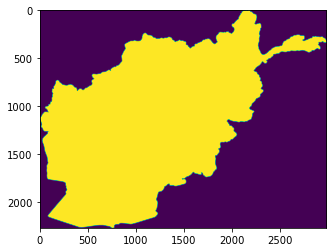

In [2]:
im = np.pad(invert(np.array(Image.open('lib/silhouettes/afghanistan-silhouette.bmp').convert('L'))), 1)
plt.imshow(im)

In [3]:
edgeloop = EdgeLoop(im)

In [4]:
loop = edgeloop.edge_loop()

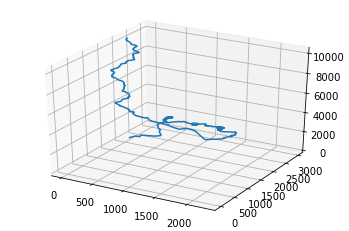

In [5]:
ax = plt.figure().add_subplot(111, projection='3d')
ax.plot([p[0] for p in loop], [p[1] for p in loop], np.arange(len(loop)))

In [6]:
ref = np.array([[7, 0, 1],
           [6, 8, 2],
           [5, 4, 3]])

In [10]:
r = neighbour_array.relative_neighbour_binary(np.array(loop[1]), np.array(loop[0]))
b = neighbour_array.relative_neighbour_binary(np.array(loop[1]), np.array(loop[2]))
r, b

(6, 2)

In [12]:
nploop = np.array(loop)
r = neighbour_array.relative_neighbour_binary(nploop, np.roll(nploop, 1, 0))
b = neighbour_array.relative_neighbour_binary(nploop, np.roll(nploop, -1, 0))
r.shape, b.shape

((10377,), (10377,))

In [14]:
angles = 45 * (b - r) % 360